    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


<Axes: xlabel='wt', ylabel='mpg'>

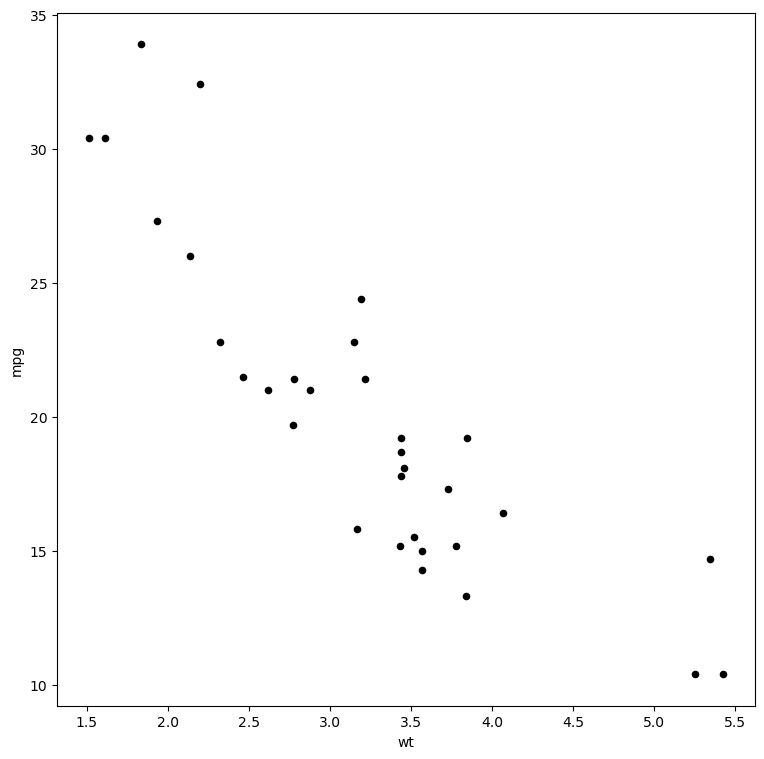

In [1]:
import pandas as pd
mtcars=pd.read_csv(r"C:\Users\hegde\Downloads\mtcars.csv")
print(mtcars.head())
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black")

In [2]:
from sklearn import linear_model
regression_model=linear_model.LinearRegression()
regression_model.fit(X=pd.DataFrame(mtcars["wt"]),
                    y=mtcars["mpg"])
print(regression_model.intercept_)
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [3]:
regression_model.score(X=pd.DataFrame(mtcars["wt"]),
                    y=mtcars["mpg"])

0.7528327936582646

In [4]:
train_prediction=regression_model.predict(X=pd.DataFrame(mtcars["wt"]))
residuals=mtcars["mpg"]-train_prediction
residuals.describe()

count    3.200000e+01
mean    -4.996004e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


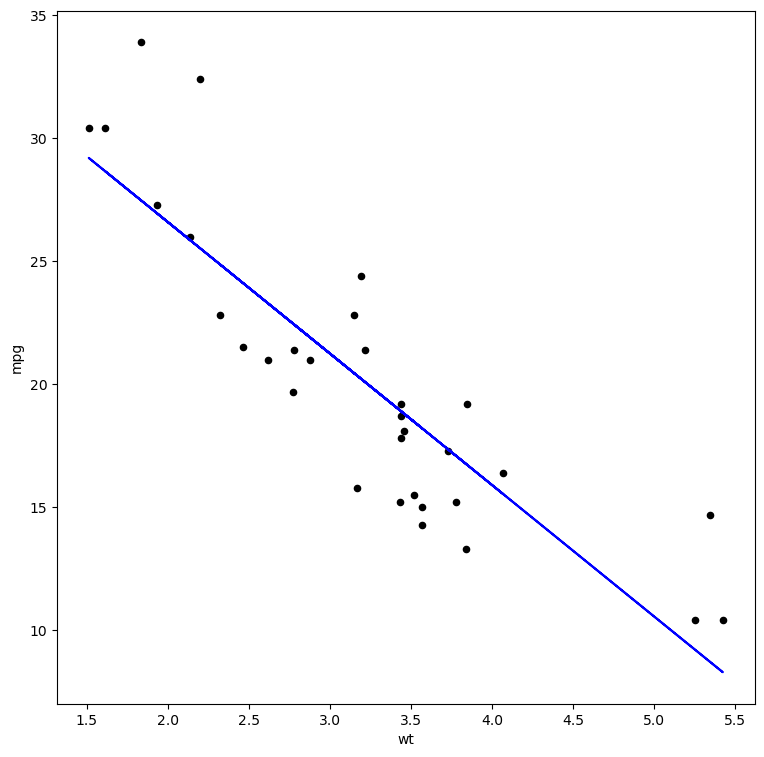

In [5]:
import matplotlib.pyplot as plt
mtcars=pd.read_csv(r"C:\Users\hegde\Downloads\mtcars.csv")
print(mtcars.head())
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black")
plt.plot(mtcars["wt"],
         train_prediction,
         color="blue");

# Polynomial Regression

In [6]:
poly_model=linear_model.LinearRegression()
predictors=pd.DataFrame([mtcars["wt"],
                        mtcars["wt"]**2]).T

poly_model.fit(X=predictors,
              y=mtcars["mpg"])
#y-intercept
print("model intercept: ",poly_model.intercept_)
print()
#coefficients
print("model coefficients: ",poly_model.coef_)
print()
#r-squared
print()
print("model accuracy: ",poly_model.score(X=predictors,
                      y=mtcars["mpg"]))

model intercept:  49.93081094945178

model coefficients:  [-13.38033708   1.17108689]


model accuracy:  0.8190613581384094


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


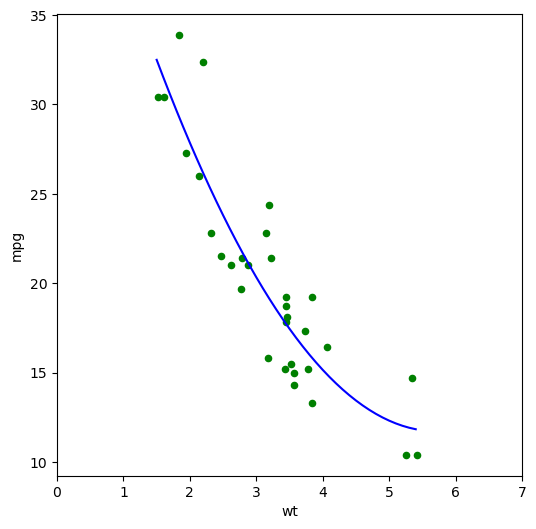

In [7]:
import numpy as np
poly_line_range=np.arange(1.5,5.5,0.1)

poly_predictors=pd.DataFrame([poly_line_range,
                             poly_line_range**2]).T

y_values=poly_model.predict(X=poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(6,6),
           color="green",
           xlim=(0,7))

plt.plot(poly_line_range,
        y_values,
        color="blue");

In [9]:
poly_model=linear_model.LinearRegression()

predictors=pd.DataFrame([mtcars["wt"],
                        mtcars["wt"]**2,
                        mtcars["wt"]**3,
                        mtcars["wt"]**4,
                        mtcars["wt"]**5,
                        mtcars["wt"]**6,
                        mtcars["wt"]**7,
                        mtcars["wt"]**8,
                        mtcars["wt"]**9,
                        mtcars["wt"]**10,]).T

poly_model.fit(X=predictors,
              y=mtcars["mpg"])


print("model intercept: ",poly_model.intercept_)
print()

print("model coefficients: ",poly_model.coef_)
print()

poly_model.score(X=predictors,
                y=mtcars["mpg"])

model intercept:  -14921.12012796076

model coefficients:  [ 6.45813551e+04 -1.20086129e+05  1.26931926e+05 -8.46598441e+04
  3.73155193e+04 -1.10334754e+04  2.16590402e+03 -2.70730542e+02
  1.94974160e+01 -6.15515431e-01]



0.8702106585564091

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


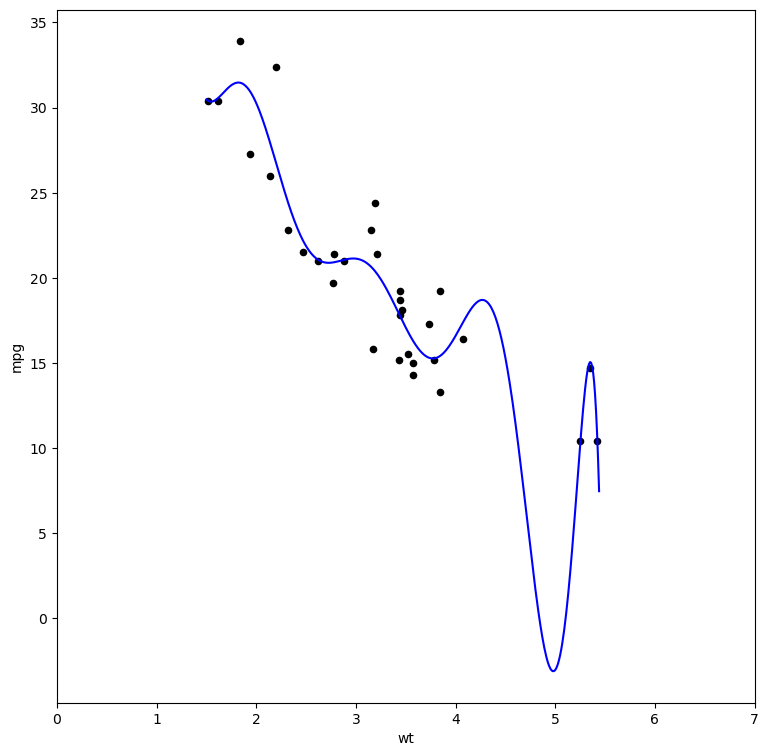

In [10]:
p_range=np.arange(1.5,5.45,0.01)

poly_predictors=pd.DataFrame([p_range,p_range**2,p_range**3,
                             p_range**4,p_range**5,p_range**6,
                             p_range**7,p_range**8,p_range**9,
                             p_range**10]).T
#corresponding y values from model
y_values=poly_model.predict(X=poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim=(0,7))
#plot curve line
plt.plot(p_range,    #x axis range
        y_values,    #predicted values
        color="blue");